In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
path = 'C:/Users/wjssm/Desktop/kaggle/competition/Elo_Merchant_Category_Recommendation/data/'
merchant = pd.read_csv(path+'merchants.csv') #key : merchant_id

In [4]:
transaction = pd.read_pickle(path + 'merged_transaction.pkl')
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19


In [18]:
transaction.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               234081
merchant_category_id          0
merchant_id              164697
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2764609
state_id                      0
subsector_id                  0
dtype: int64

In [103]:
len(transaction.merchant_id.unique())

334634

In [5]:
#transaction 데이터에 merchant_id 개수가 더 많음
len(set(transaction.merchant_id) - set(merchant.merchant_id))

164697

In [6]:
len(set(merchant.merchant_id) - set(transaction.merchant_id))

0

In [5]:
merchant.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [13]:
#왜 다를까?ㅎㅎ
print('merchant 데이터 개수 : ' , len(merchant))
print('merchant merchant_id 개수 : ' , len(merchant.merchant_id.unique()))

merchant 데이터 개수 :  334696
merchant merchant_id 개수 :  334633


In [7]:
merchant.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [22]:
merchant.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

## transaction 에 있는 city_id, merchant_id, state_id, subsector_id 는 card_id기준의 정보인가? -> merchant기준인 것 같음
## merchant에 있는 id정보는 merchant의 정보인가?

## 그러면 merchant_id가 같으면 -> merchant_category_id,city_id, state_id,subsector_id,merchant_group_id,category_2 같아야 됨

In [64]:
transaction.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_a33355a1b7,-12,-0.467415,2017-02-14 15:47:45,3.0,2,33
2,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-12,-0.572600,2017-02-16 15:37:58,3.0,2,19
3,Y,C_ID_00007093c1,244,N,3,C,705,M_ID_a33355a1b7,-12,-0.331575,2017-02-20 12:19:01,3.0,2,33
4,Y,C_ID_00007093c1,244,N,1,B,307,M_ID_9400cf2342,-11,-0.483944,2017-03-03 00:24:15,3.0,2,19


In [70]:
#다 바꿀까? 하다가 어차피 mode로 사용하니까 냅둔다..
print('같은 행의 개수 :',sum(transaction.loc[transaction.merchant_id == 'M_ID_69423b34e4',transaction.columns.str.endswith('id') | 
                                                                transaction.columns.str.endswith('category_2')].duplicated()) )
print('데이터의 개수 : ' ,len(transaction.loc[transaction.merchant_id == 'M_ID_69423b34e4',:])-1)

같은 행의 개수 : 3332
데이터의 개수 :  4579


In [ ]:
#타협해서 merchant_multi는 몇 개 안 되니까 다 바꾸려다가 안 함 개뻘짓..

In [87]:
merchant_multi.merchant_id.unique()

array(['M_ID_c0b712e11a', 'M_ID_0039220eb3', 'M_ID_bd49e37dda',
       'M_ID_ef233cff26', 'M_ID_dbbf07ebf0', 'M_ID_0c4018d3a0',
       'M_ID_c470fbcfb9', 'M_ID_508ecbdcde', 'M_ID_0b8ed0c2b0',
       'M_ID_49b779bc8a', 'M_ID_8951e22556', 'M_ID_30340088f2',
       'M_ID_654509ddbc', 'M_ID_6017075769', 'M_ID_645a6af169',
       'M_ID_32d73b8ecf', 'M_ID_a8767b29ef', 'M_ID_a55beb9d9a',
       'M_ID_0a00fa9e8a', 'M_ID_26d4fadb60', 'M_ID_07a5671b4c',
       'M_ID_b794b9d9e8', 'M_ID_fea38c640b', 'M_ID_28c2aace87',
       'M_ID_49daf8a838', 'M_ID_ae9fe1605a', 'M_ID_00a6ca8a8a',
       'M_ID_1ceca881f0', 'M_ID_9b0ef314cf', 'M_ID_7483dde87d',
       'M_ID_ebbdb42da6', 'M_ID_7251df88ad', 'M_ID_57e97f6546',
       'M_ID_6c144405a0', 'M_ID_c2b9ac2ea4', 'M_ID_992a180b15',
       'M_ID_d123532c72', 'M_ID_d2b5d4418d', 'M_ID_42697d5d44',
       'M_ID_6464db3b45', 'M_ID_1802942aaf'], dtype=object)

In [135]:
merchant_multi.loc[merchant_multi.merchant_id =='M_ID_0039220eb3', merchant_multi.columns.str.endswith('id')| merchant_multi.columns.str.endswith('category_2')]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,city_id,state_id,category_2
111,M_ID_0039220eb3,35,836,5,-1,-1,NaN
112,M_ID_0039220eb3,35,836,5,-1,-1,NaN


In [136]:
a = transaction.loc[transaction.merchant_id == 'M_ID_0039220eb3', transaction.columns.str.endswith('id') | transaction.columns.str.endswith('category_2')]
a

,card_id,city_id,merchant_category_id,merchant_id,category_2,state_id,subsector_id
213762,C_ID_01bc419b90,281,836,M_ID_0039220eb3,5.0,21,5
213763,C_ID_01bc419b90,281,836,M_ID_0039220eb3,5.0,21,5
213779,C_ID_01bc419b90,281,836,M_ID_0039220eb3,5.0,21,5
830151,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830153,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830159,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830196,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830206,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830244,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5
830302,C_ID_06c52c2451,-1,836,M_ID_0039220eb3,NaN,-1,5


In [119]:
city_id = 231; merchant_category_id = 451; category_2 =1.0 ; state_id = 15;  subsector_id = 7
m_id = 'M_ID_0b8ed0c2b0'

columns = ['city_id','merchant_category_id','category_2','state_id','subsector_id']

transaction.loc[transaction.merchant_id == m_id, columns] = [city_id, merchant_category_id, category_2, state_id, subsector_id]
merchant.loc[merchant.merchant_id == m_id, columns] = [city_id, merchant_category_id, category_2, state_id, subsector_id]

In [46]:
group_id_counts = merchant.merchant_group_id.value_counts().sort_values()
group_id_counts = pd.DataFrame(group_id_counts).reset_index()
group_id_counts.columns = ['merchant_group_id', 'counts']
group_id_counts.head()

,merchant_group_id,counts
0,94267,1
1,43476,1
2,39378,1
3,33233,1
4,35280,1


##### numerical_1, numerical_2

In [66]:
merchant.loc[:,['numerical_1', 'numerical_2']].describe()

,numerical_1,numerical_2
count,334696.000000,334696.000000
mean,0.011476,0.008103
std,1.098154,1.070497
min,-0.057471,-0.057471
25%,-0.057471,-0.057471
50%,-0.057471,-0.057471
75%,-0.047556,-0.047556
max,183.735111,182.079322


In [79]:
#둘 중 하나만 선택
merchant.loc[:,['numerical_1', 'numerical_2']].corr()

,numerical_1,numerical_2
numerical_1,1.000000,0.998749
numerical_2,0.998749,1.000000


In [6]:
merchant.drop(['numerical_2'], axis = 1, inplace=True)

# numerical_1 : log, one-hot

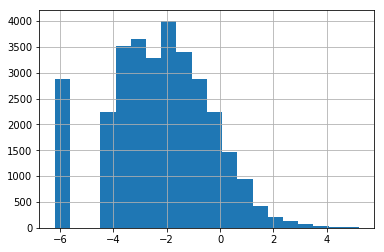

In [77]:
#0보다 큰 값만 log
np.log(merchant.loc[merchant.numerical_1 > 0,'numerical_1']).hist(bins = 20)

## numerical_1_log : 0보다 크게 만들어서 log

In [7]:
merchant['numerical_1_log'] = np.log(merchant.numerical_1 - np.array([merchant.numerical_1.min()-0.0000001]))

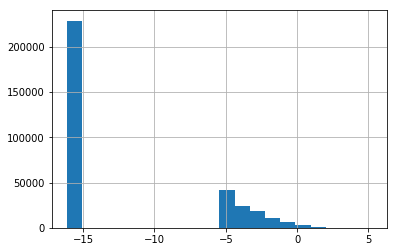

In [8]:
merchant['numerical_1_log'].hist(bins = 20)

## numerical_1_one_hot : 75%까지만 0로 나머지 1

In [9]:
merchant['numerical_1_one_hot'] = 0
merchant.loc[merchant.numerical_1 > -0.047556,'numerical_1_one_hot'] = 1

In [149]:
merchant.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2', 'numerical_1_log',
       'numerical_1_one_hot'],
      dtype='object')

## most_recent_sales_range, most_recent_purchases_range
- A등급인것만 1로
- A,B등급까지만 1로

In [10]:
merchant['sales_A'] = 0
merchant.loc[merchant.most_recent_sales_range == 'A', 'sales_A'] = 1
merchant['sales_AB'] = 0
merchant.loc[(merchant.most_recent_sales_range == 'A') | (merchant.most_recent_sales_range == 'B'), 'sales_AB'] = 1

merchant['purchase_A'] = 0
merchant.loc[merchant.most_recent_purchases_range == 'A', 'purchase_A'] = 1
merchant['purchase_AB'] = 0
merchant.loc[(merchant.most_recent_purchases_range == 'A') | (merchant.most_recent_purchases_range == 'B'), 'purchase_AB'] = 1

In [19]:
rangeDict = {'A':0, 'B':1, 'C':2,'D':3,'E':4}

def range_to_num(x):
    if pd.isna(x): return 3
    else : return rangeDict[x]


In [20]:
merchant.most_recent_sales_range.value_counts()

E    177104
D    117475
C     34075
B      5037
A      1005
Name: most_recent_sales_range, dtype: int64

In [21]:
merchant['most_recent_sales_range'] = merchant['most_recent_sales_range'].apply(lambda row : range_to_num(row))

In [22]:
merchant.most_recent_sales_range.value_counts()

4    177104
3    117475
2     34075
1      5037
0      1005
Name: most_recent_sales_range, dtype: int64

In [12]:
merchant.most_recent_purchases_range.value_counts()

E    175309
D    119187
C     34144
B      5046
A      1010
Name: most_recent_purchases_range, dtype: int64

In [23]:
merchant['most_recent_purchases_range'] = merchant['most_recent_purchases_range'].apply(lambda row : range_to_num(row))

In [24]:
merchant.most_recent_purchases_range.value_counts()

4    175309
3    119187
2     34144
1      5046
0      1010
Name: most_recent_purchases_range, dtype: int64

## avg_sales_lag12 : 의미 있나? 어차피  등급으로 있는데

In [162]:
#drop
merchant.drop(['avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3','avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6'],
             axis = 1, inplace=True)

In [164]:
merchant.loc[:, merchant.columns.str.endswith('lag12')].head()

,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
0,-2.32,13.916667,12
1,-0.57,1.687500,12
2,-82.13,260.000000,2
3,NaN,3.833333,12
4,NaN,0.347222,12


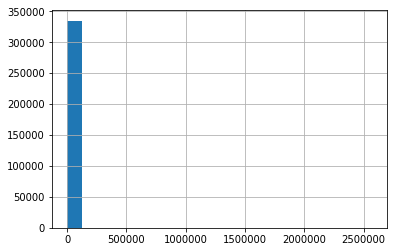

In [167]:
merchant['avg_sales_lag12'].hist(bins = 20)

In [168]:
merchant['avg_sales_lag12'].describe()

count    3.346830e+05
mean     2.522771e+01
std      5.251842e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.020000e+00
75%      1.290000e+00
max      2.567408e+06
Name: avg_sales_lag12, dtype: float64

In [16]:
transaction.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [17]:
merchant.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'category_1', 'most_recent_sales_range',
       'most_recent_purchases_range', 'avg_sales_lag3', 'avg_purchases_lag3',
       'active_months_lag3', 'avg_sales_lag6', 'avg_purchases_lag6',
       'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12',
       'active_months_lag12', 'category_4', 'city_id', 'state_id',
       'category_2', 'numerical_1_log', 'numerical_1_one_hot', 'sales_A',
       'sales_AB', 'purchase_A', 'purchase_AB'],
      dtype='object')

## transaction, merchant merge

In [27]:
#column 지정해서 다시 하자
trans_mer = pd.merge(transaction, merchant[['merchant_id','merchant_group_id','numerical_1','most_recent_sales_range','most_recent_purchases_range','category_4',
         'numerical_1_log','numerical_1_one_hot', 'sales_A','sales_AB', 'purchase_A', 'purchase_AB']], on = ['merchant_id'])

In [36]:
#trans_mer.to_pickle('trans_mer.pkl')

In [28]:
trans_mer.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,merchant_group_id,numerical_1,most_recent_sales_range,most_recent_purchases_range,category_4,numerical_1_log,numerical_1_one_hot,sales_A,sales_AB,purchase_A,purchase_AB
0,Y,C_ID_00007093c1,244,N,2,C,705,M_ID_69423b34e4,-12,0.037176,2017-02-14 14:00:43,3.0,2,33,35,15.855951,0,0,N,2.767163,1,1,1,1,1
1,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.401298,2017-03-08 15:05:29,3.0,2,33,35,15.855951,0,0,N,2.767163,1,1,1,1,1
2,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.566590,2017-03-11 15:04:31,3.0,2,33,35,15.855951,0,0,N,2.767163,1,1,1,1,1
3,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.677936,2017-03-11 15:10:15,3.0,2,33,35,15.855951,0,0,N,2.767163,1,1,1,1,1
4,Y,C_ID_00007093c1,244,N,1,B,705,M_ID_69423b34e4,-11,-0.566590,2017-03-11 15:26:58,3.0,2,33,35,15.855951,0,0,N,2.767163,1,1,1,1,1


In [32]:
from scipy import stats
def mode(x):
    return stats.mode(x)[1][0]

In [34]:
#위치 관련 변수들 mode
loc_var = trans_mer.groupby(['card_id'])['city_id','state_id','subsector_id','category_2'].agg([mode])
loc_var.head()

,city_id,state_id,subsector_id,category_2
,mode,mode,mode,mode
card_id,,,,
C_ID_00007093c1,100,121,48,121.0
C_ID_0001238066,47,113,39,116.0
C_ID_0001506ef0,64,65,26,65.0
C_ID_0001793786,114,116,58,84.0
C_ID_000183fdda,133,138,32,142.0


In [40]:
loc_var.columns = ['city_id_mode','state_id_mode','subsector_id_mode','category_2_mode']
loc_var.head()

,city_id_mode,state_id_mode,subsector_id_mode,category_2_mode
card_id,,,,
C_ID_00007093c1,100,121,48,121.0
C_ID_0001238066,47,113,39,116.0
C_ID_0001506ef0,64,65,26,65.0
C_ID_0001793786,114,116,58,84.0
C_ID_000183fdda,133,138,32,142.0


In [37]:
merchant_mode = trans_mer.groupby(['card_id'])['merchant_group_id','most_recent_sales_range','most_recent_purchases_range','category_4'].agg([mode])
merchant_mode.head()

C:\Users\wjssm\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,merchant_group_id,most_recent_sales_range,most_recent_purchases_range,category_4
,mode,mode,mode,mode
card_id,,,,
C_ID_00007093c1,42,61,64,100
C_ID_0001238066,32,72,54,119
C_ID_0001506ef0,15,26,29,68
C_ID_0001793786,68,88,79,179
C_ID_000183fdda,40,51,52,153


In [41]:
merchant_mode.columns = ['merchant_group_id_mode','most_recent_sales_range_mode','most_recent_purchases_range_mode','category_4_mode']
merchant_mode.head()

,merchant_group_id_mode,most_recent_sales_range_mode,most_recent_purchases_range_mode,category_4_mode
card_id,,,,
C_ID_00007093c1,42,61,64,100
C_ID_0001238066,32,72,54,119
C_ID_0001506ef0,15,26,29,68
C_ID_0001793786,68,88,79,179
C_ID_000183fdda,40,51,52,153


In [38]:
merchant_var = trans_mer.groupby(['card_id'])['numerical_1','numerical_1_log','numerical_1_one_hot',
                                'sales_A','sales_AB','purchase_A','purchase_AB'].agg(["sum", "mean", "min", "max",'nunique','size','std',mode])
merchant_var.head()

numerical_1                                               \
                         sum      mean       min         max nunique size   
card_id                                                                     
C_ID_00007093c1   269.903018  1.775678 -0.057471   15.855951      19  152   
C_ID_0001238066  1324.029763  8.886106 -0.057471  129.322116      25  149   
C_ID_0001506ef0    65.518175  0.949539 -0.057471   15.389950      18   69   
C_ID_0001793786   287.200209  1.135179 -0.057471  117.830742      40  253   
C_ID_000183fdda    32.496868  0.203105 -0.057471    4.523215      24  160   

                                 numerical_1_log                       \
                       std  mode             sum      mean        min   
card_id                                                                 
C_ID_00007093c1   4.375246  48.0     -727.491771 -4.786130 -16.118096   
C_ID_0001238066  30.214755  60.0    -1140.205184 -7.652384 -16.118096   
C_ID_0001506ef0   2.570220  19.0     -396.666007 -5.748783 -16.118096   
C_ID_0001793786   8.176793  75.0    -1669.227769 -6.597738 -16.118096   
C_ID_000183fdda   0.733059  53.0    -1121.605383 -7.010034 -16.118096   

                                                       numerical_1_one_hot  \
                      max nunique size       std  mode                 sum   
card_id                                                                      
C_ID_00007093c1  2.767163      19  152  5.729859  48.0                 126   
C_ID_0001238066  4.862751      25  149  7.390348  60.0                  89   
C_ID_0001506ef0  2.737442      18   69  6.754124  19.0                  50   
C_ID_0001793786  4.769737      40  253  6.443837  75.0                 178   
C_ID_000183fdda  1.521849      24  160  6.585282  53.0                 107   

                                                              sales_A  \
                     mean min max nunique size       std mode     sum   
card_id                                                                 
C_ID_00007093c1  0.828947   0   1       2  152  0.377800  126      52   
C_ID_0001238066  0.597315   0   1       2  149  0.492092   89      22   
C_ID_0001506ef0  0.724638   0   1       2   69  0.449969   50      26   
C_ID_0001793786  0.703557   0   1       2  253  0.457594  178      35   
C_ID_000183fdda  0.668750   0   1       2  160  0.472141  107      12   

                                                              sales_AB  \
                     mean min max nunique size       std mode      sum   
card_id                                                                  
C_ID_00007093c1  0.342105   0   1       2  152  0.475983  100       64   
C_ID_0001238066  0.147651   0   1       2  149  0.355950  127       46   
C_ID_0001506ef0  0.376812   0   1       2   69  0.488137   43       38   
C_ID_0001793786  0.138340   0   1       2  253  0.345941  218       81   
C_ID_000183fdda  0.075000   0   1       2  160  0.264218  148       63   

                                                              purchase_A  \
                     mean min max nunique size       std mode        sum   
card_id                                                                    
C_ID_00007093c1  0.421053   0   1       2  152  0.495360   88         45   
C_ID_0001238066  0.308725   0   1       2  149  0.463525  103         23   
C_ID_0001506ef0  0.550725   0   1       2   69  0.501065   38         29   
C_ID_0001793786  0.320158   0   1       2  253  0.467462  172         37   
C_ID_000183fdda  0.393750   0   1       2  160  0.490115   97         11   

                                                              purchase_AB  \
                     mean min max nunique size       std mode         sum   
card_id                                                                     
C_ID_00007093c1  0.296053   0   1       2  152  0.458024  107          62   
C_ID_0001238066  0.154362   0   1       2  149  0.362514  126          66   
C_ID_0001506ef0  0

In [55]:
col = ['numerical_1','numerical_1_log','numerical_1_one_hot',
                                'sales_A','sales_AB','purchase_A','purchase_AB']
agg = ['sum','mean','min','max','nunique','size','std','mode']
new_col = []

for c in col :
    for a in agg :
        new_col.append(c + '_' +a)

In [56]:
merchant_var.columns = new_col
merchant_var.head()

,numerical_1_sum,numerical_1_mean,numerical_1_min,numerical_1_max,numerical_1_nunique,numerical_1_size,numerical_1_std,numerical_1_mode,numerical_1_log_sum,numerical_1_log_mean,numerical_1_log_min,numerical_1_log_max,numerical_1_log_nunique,numerical_1_log_size,numerical_1_log_std,numerical_1_log_mode,numerical_1_one_hot_sum,numerical_1_one_hot_mean,numerical_1_one_hot_min,numerical_1_one_hot_max,numerical_1_one_hot_nunique,numerical_1_one_hot_size,numerical_1_one_hot_std,numerical_1_one_hot_mode,sales_A_sum,sales_A_mean,sales_A_min,sales_A_max,sales_A_nunique,sales_A_size,sales_A_std,sales_A_mode,sales_AB_sum,sales_AB_mean,sales_AB_min,sales_AB_max,sales_AB_nunique,sales_AB_size,sales_AB_std,sales_AB_mode,purchase_A_sum,purchase_A_mean,purchase_A_min,purchase_A_max,purchase_A_nunique,purchase_A_size,purchase_A_std,purchase_A_mode,purchase_AB_sum,purchase_AB_mean,purchase_AB_min,purchase_AB_max,purchase_AB_nunique,purchase_AB_size,purchase_AB_std,purchase_AB_mode
card_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C_ID_00007093c1,269.903018,1.775678,-0.057471,15.855951,19,152,4.375246,48.0,-727.491771,-4.786130,-16.118096,2.767163,19,152,5.729859,48.0,126,0.828947,0,1,2,152,0.377800,126,52,0.342105,0,1,2,152,0.475983,100,64,0.421053,0,1,2,152,0.495360,88,45,0.296053,0,1,2,152,0.458024,107,62,0.407895,0,1,2,152,0.493068,90
C_ID_0001238066,1324.029763,8.886106,-0.057471,129.322116,25,149,30.214755,60.0,-1140.205184,-7.652384,-16.118096,4.862751,25,149,7.390348,60.0,89,0.597315,0,1,2,149,0.492092,89,22,0.147651,0,1,2,149,0.355950,127,46,0.308725,0,1,2,149,0.463525,103,23,0.154362,0,1,2,149,0.362514,126,66,0.442953,0,1,2,149,0.498410,83
C_ID_0001506ef0,65.518175,0.949539,-0.057471,15.389950,18,69,2.570220,19.0,-396.666007,-5.748783,-16.118096,2.737442,18,69,6.754124,19.0,50,0.724638,0,1,2,69,0.449969,50,26,0.376812,0,1,2,69,0.488137,43,38,0.550725,0,1,2,69,0.501065,38,29,0.420290,0,1,2,69,0.497222,40,36,0.521739,0,1,2,69,0.503187,36
C_ID_0001793786,287.200209,1.135179,-0.057471,117.830742,40,253,8.176793,75.0,-1669.227769,-6.597738,-16.118096,4.769737,40,253,6.443837,75.0,178,0.703557,0,1,2,253,0.457594,178,35,0.138340,0,1,2,253,0.345941,218,81,0.320158,0,1,2,253,0.467462,172,37,0.146245,0,1,2,253,0.354052,216,76,0.300395,0,1,2,253,0.459339,177
C_ID_000183fdda,32.496868,0.203105,-0.057471,4.523215,24,160,0.733059,53.0,-1121.605383,-7.010034,-16.118096,1.521849,24,160,6.585282,53.0,107,0.668750,0,1,2,160,0.472141,107,12,0.075000,0,1,2,160,0.264218,148,63,0.393750,0,1,2,160,0.490115,97,11,0.068750,0,1,2,160,0.253823,149,53,0.331250,0,1,2,160,0.472141,107


# 모델 확인

In [29]:
train = pd.read_csv(path + 'train2.csv')
test = pd.read_csv(path + 'test2.csv')


In [58]:
train = pd.merge(train,loc_var, on = 'card_id')
train = pd.merge(train,merchant_mode, on = 'card_id')
train = pd.merge(train,merchant_var, on = 'card_id')

In [57]:
test = pd.merge(test,loc_var, on = 'card_id')
test = pd.merge(test,merchant_mode, on = 'card_id')
test = pd.merge(test,merchant_var, on = 'card_id')

In [59]:
train.head()

,card_id,feature_1,feature_2,feature_3,target,history_month_nunique,history_hour_nunique,history_weekofyear_nunique,history_dayofweek_nunique,history_year_nunique,history_subsector_id_nunique,history_merchant_id_nunique,history_merchant_category_id_nunique,history_city_id_nunique,history_state_id_nunique,history_installments_sum,history_installments_mean,history_installments_std,history_installments_min,history_installments_max,history_installments_percentile_25,history_installments_percentile_50,history_installments_percentile_75,history_purchase_amount_sum,history_purchase_amount_mean,history_purchase_amount_std,history_purchase_amount_min,history_purchase_amount_max,history_purchase_amount_percentile_25,history_purchase_amount_percentile_50,history_purchase_amount_percentile_75,history_purchase_amount_purchase_amount_over_550,history_purchase_date_purchase_date_duration,history_weekend_sum,history_weekend_mean,history_authorized_flag_authorized_flag_cnt_N,history_authorized_flag_authorized_flag_cnt_Y,history_category_1_category_1_cnt_N,history_category_1_category_1_cnt_Y,history_installments_installments_cnt_-1,history_installments_installments_cnt_0,history_installments_installments_cnt_1,history_installments_installments_cnt_10,history_installments_installments_cnt_11,history_installments_installments_cnt_12,history_installments_installments_cnt_2,history_installments_installments_cnt_3,history_installments_installments_cnt_4,history_installments_installments_cnt_5,history_installments_installments_cnt_6,history_installments_installments_cnt_7,history_installments_installments_cnt_8,history_installments_installments_cnt_9,history_installments_installments_cnt_999,history_category_3_category_3_cnt_A,history_category_3_category_3_cnt_B,history_category_3_category_3_cnt_C,history_category_3_category_3_cnt_NULL,history_month_lag_month_lag_cnt_-1,history_month_lag_month_lag_cnt_-10,history_month_lag_month_lag_cnt_-11,history_month_lag_month_lag_cnt_-12,history_month_lag_month_lag_cnt_-13,history_month_lag_month_lag_cnt_-2,history_month_lag_month_lag_cnt_-3,history_month_lag_month_lag_cnt_-4,history_month_lag_month_lag_cnt_-5,history_month_lag_month_lag_cnt_-6,history_month_lag_month_lag_cnt_-7,history_month_lag_month_lag_cnt_-8,history_month_lag_month_lag_cnt_-9,history_month_lag_month_lag_cnt_0,history_category_2_category_2_cnt_1.0,history_category_2_category_2_cnt_2.0,history_category_2_category_2_cnt_3.0,history_category_2_category_2_cnt_4.0,history_category_2_category_2_cnt_5.0,history_category_2_category_2_cnt_NULL,year,month,authorized,not_authorized,authorized_rate,visit_sum,visit_mean,visit_min,visit_max,visit_nunique,visit_size,visit_mode,try_mean,try_std,try_min,try_max,try_nunique,try_size,try_mode,Ref_mean,Ref_std,Ref_min,Ref_max,Ref_nunique,Ref_size,Ref_mode,city_id_mode,state_id_mode,subsector_id_mode,category_2_mode,merchant_group_id_mode,most_recent_sales_range_mode,most_recent_purchases_range_mode,category_4_mode,numerical_1_sum,numerical_1_mean,numerical_1_min,numerical_1_max,numerical_1_nunique,numerical_1_size,numerical_1_std,numerical_1_mode,numerical_1_log_sum,numerical_1_log_mean,numerical_1_log_min,numerical_1_log_max,numerical_1_log_nunique,numerical_1_log_size,numerical_1_log_std,numerical_1_log_mode,numerical_1_one_hot_sum,numerical_1_one_hot_mean,numerical_1_one_hot_min,numerical_1_one_hot_max,numerical_1_one_hot_nunique,numerical_1_one_hot_size,numerical_1_one_hot_std,numerical_1_one_hot_mode,sales_A_sum,sales_A_mean,sales_A_min,sales_A_max,sales_A_nunique,sales_A_size,sales_A_std,sales_A_mode,sales_AB_sum,sales_AB_mean,sales_AB_min,sales_AB_max,sales_AB_nunique,sales_AB_size,sales_AB_std,sales_AB_mode,purchase_A_sum,purchase_A_mean,purchase_A_min,purchase_A_max,purchase_A_nunique,purchase_A_size,purchase_A_std,purchase_A_mode,purchase_AB_sum,purchase_AB_mean,purchase_AB_min,purchase_AB_max,purchase_AB_nunique,purchase_AB_size,purchase_AB_std,purchase_AB_mode
0,C_ID_92a2005557,5,2,1,-0.820283,9,23,

In [ ]:
train.set_index('card_id', inplace=True)
test.set_index('card_id', inplace=True)

In [60]:
x_train = train.drop(['target'], axis=1)
y_train = train['target']

In [61]:
from lightgbm import LGBMRegressor

In [62]:
lgb = LGBMRegressor()

In [66]:
result2 = lgb.fit(x_train, y_train)
lgb_pred = result2.predict(test)

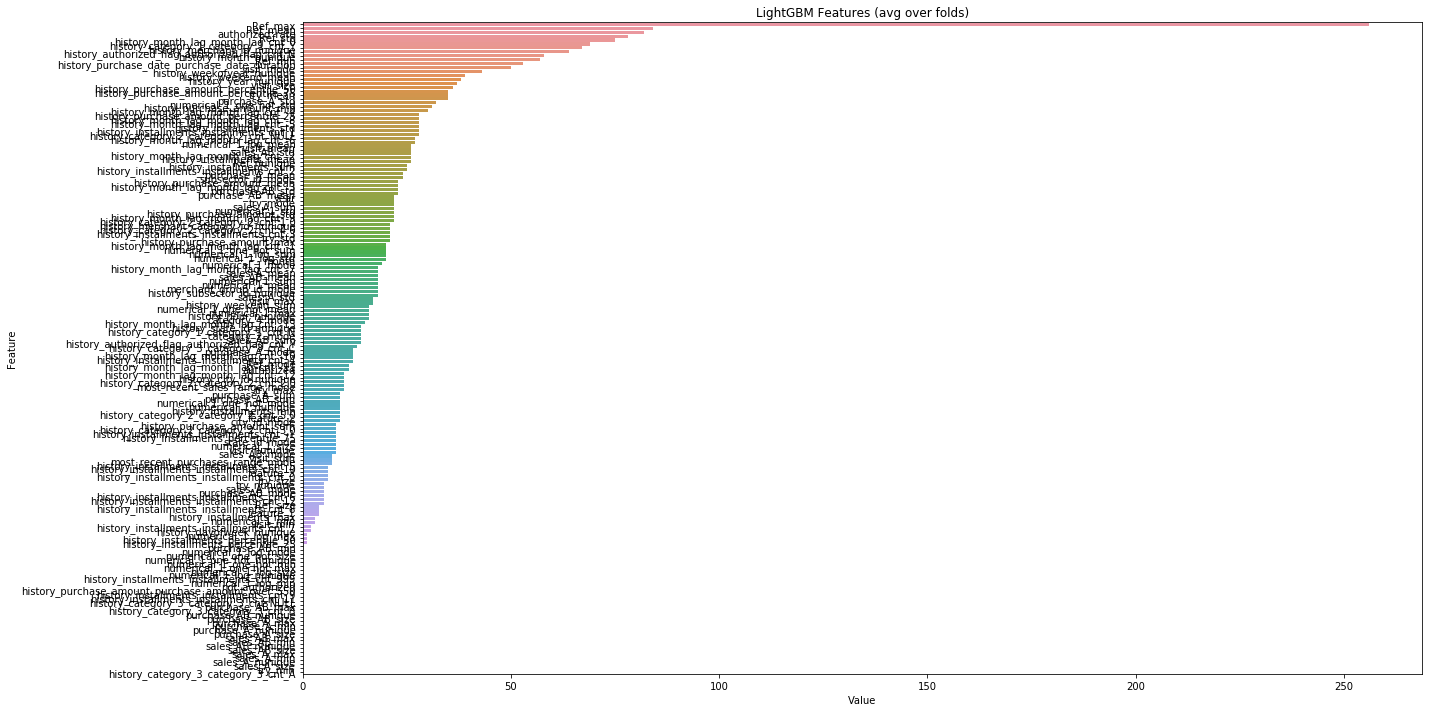

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_, x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')

In [68]:
feature_imp.sort_values(by="Value", ascending=False)

,Value,Feature
165,256,Ref_max
164,84,Ref_mean
163,82,authorized_rate
162,78,Ref_std
161,75,history_month_lag_month_lag_cnt_0
160,69,history_category_1_category_1_cnt_Y
159,67,history_merchant_id_nunique
158,64,history_authorized_flag_authorized_flag_cnt_N
157,58,history_month_nunique
156,57,Ref_min


In [69]:
lgb_pred = pd.DataFrame(lgb_pred, index=test.index, columns=['target'])

In [70]:
#3.905
lgb_pred.to_csv('190211_lgb.csv')

In [ ]:
lgb_pred = pd.DataFrame(lgb_pred, index=test.index, columns=['target'])